In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
### Read model database (excel) and save it as dataframe (df)
df = pd.read_excel("MODELS_DATABASE_complete_TV.xlsx")

print('Shape: ',df.shape, 'Keys: ', df.keys(), '\n')
#Get the number of rows and columns
print(f'Dataset size: {df.shape}','\n')

# for checking if any value in any data columns in null or NaN
print(df.isnull().sum())

Shape:  (500, 14) Keys:  Index(['Model', 'Width', 'Height', 'Thickness', 'Length', 'Velocity',
       'Mass_Im', 'Dynamic_Job', 'Time_req_s', 'Peak_Impact_Force_KN',
       'Energy_Absorbed_KJ', 'Deformation_CB_mm', 'Mean_impact_force_KN',
       'Mass_CB_g'],
      dtype='object') 

Dataset size: (500, 14) 

Model                   0
Width                   0
Height                  0
Thickness               0
Length                  0
Velocity                0
Mass_Im                 0
Dynamic_Job             0
Time_req_s              0
Peak_Impact_Force_KN    0
Energy_Absorbed_KJ      0
Deformation_CB_mm       0
Mean_impact_force_KN    0
Mass_CB_g               0
dtype: int64


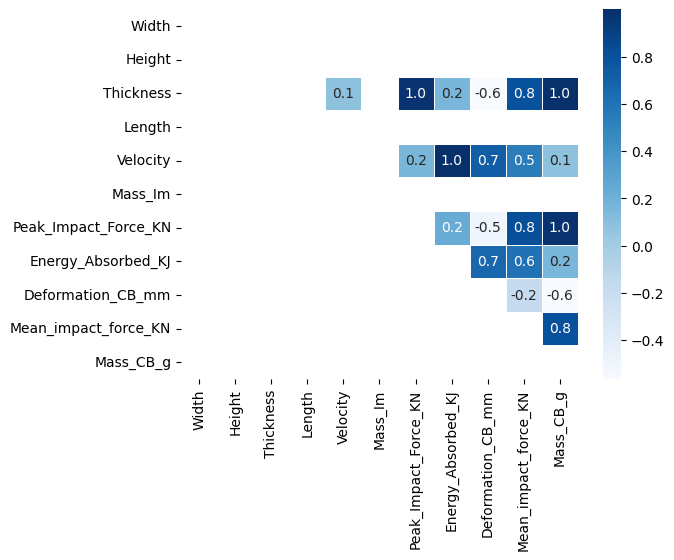

In [3]:
# Data visulization

# Compute the correlation matrix
corr = df[['Width', 'Height', 'Thickness', 'Length', 'Velocity','Mass_Im', 'Peak_Impact_Force_KN', 'Energy_Absorbed_KJ',
       'Deformation_CB_mm', 'Mean_impact_force_KN', 'Mass_CB_g']].corr()

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, cmap='Blues', annot=True, fmt=".1f", linewidth=.5, mask=mask)

fig = sns_plot.get_figure()
fig.savefig("data_analysis.svg", bbox_inches='tight', dpi=1200)
fig.savefig("data_analysis.pdf", bbox_inches='tight', dpi=1200)

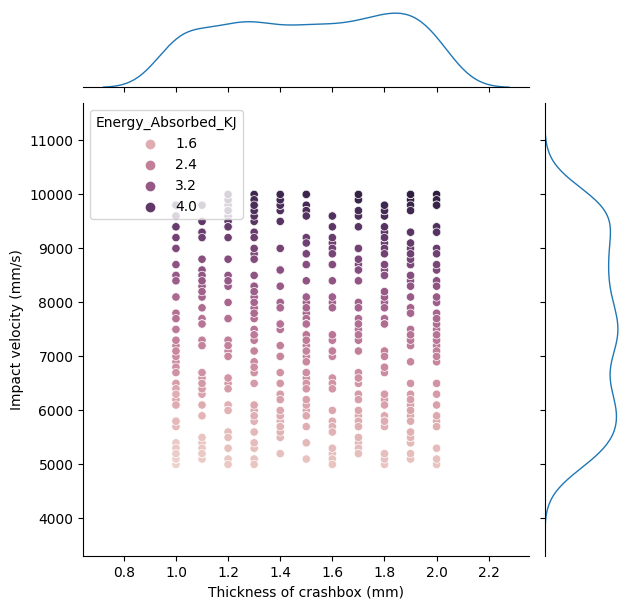

In [4]:
# fig2 = sns.jointplot(data=df, x='Thickness', y='Velocity', hue='Energy_Absorbed_KJ', kind=kdeplot)

g = sns.JointGrid()
x, y = df["Thickness"], df["Velocity"]
h= df["Energy_Absorbed_KJ"] # output crashworthiness metrics # user can change
sns.scatterplot(x=x, y=y,  hue=h , ax=g.ax_joint)
sns.kdeplot(x=x, fill=False, linewidth=1, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=1, ax=g.ax_marg_y)
g.set_axis_labels(xlabel='Thickness of crashbox (mm)', ylabel='Impact velocity (mm/s)')

plt.savefig("data_analysis_scatter_kde.svg", bbox_inches='tight', dpi=1200)
plt.savefig("data_analysis_scatter_kde.pdf", bbox_inches='tight', dpi=1200)

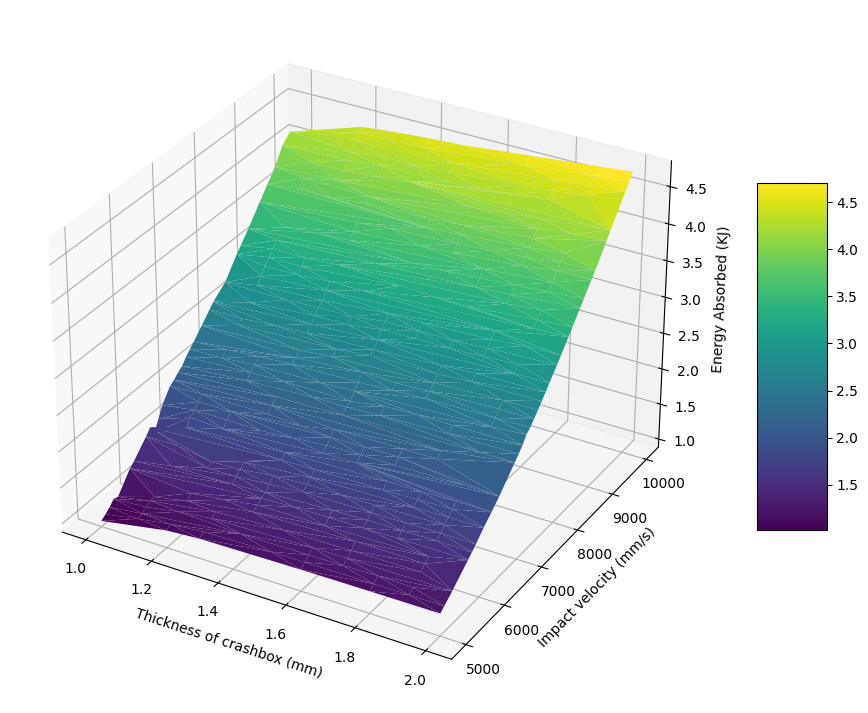

In [5]:
from matplotlib import cm

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
       
X=df["Thickness"]
Y=df["Velocity"]
Z=df["Energy_Absorbed_KJ"]

# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.viridis)

# Adding labels
ax.set_xlabel('Thickness of crashbox (mm)') 
ax.set_ylabel('Impact velocity (mm/s)') 
ax.set_zlabel('Energy Absorbed (KJ)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# fig3 = sns_plot.get_figure()
plt.savefig("data_analysis_trisurf.svg", bbox_inches='tight', dpi=1200)
plt.savefig("data_analysis_trisurf.pdf", bbox_inches='tight', dpi=1200)